# E-commerce User Journey & Funnel Analysis

### Why do thousands of users add products to their carts but never complete the purchase?
### Where in the customer journey do we lose the most users—during browsing, adding to cart, or at checkout?
### Which product categories face the highest drop-offs, and how do these patterns impact overall revenue?

### In this project, I explore an e-commerce dataset to answer these questions from product views to purchases by mapping the user journey into a conversion funnel. Using funnel charts, heatmaps, and Sankey diagrams, I highlight where customers abandon the process and provide actionable insights to improve conversions and enhance user engagement.

#### Dataset link: https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from scipy import stats
%matplotlib inline

# Data Information

## Dataset Overview:
### This dataset captures global layoffs from 2020 to April 2025, covering multiple industries, company stages, and countries. It provides insights into workforce reductions, allowing us to explore patterns across time, geography, industry, and funding levels.
### Dataset Source: Kaggle / Public dataset
### Dateset Link: https://www.kaggle.com/datasets/swaptr/layoffs-2022
### Total Records: 4,150
### Columns: 11
### Key features: date, total layoffs, % layoffs, country, location, industry, company, stag

In [2]:
oct_df = pd.read_csv('2019-oct.csv', nrows = 500000)
oct_df = oct_df.sample(n = 500000, random_state = 42)

In [3]:
oct_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
104241,2019-10-01 04:32:52 UTC,view,12719453,2053013553559896355,NaN,matador,397.44,517886245,7d1528ae-8dfa-4c97-ab4c-974815b9f431
199676,2019-10-01 06:06:39 UTC,view,10900328,2053013555069845885,appliances.kitchen.mixer,dauscher,12.84,519282157,55efefd9-53c4-472c-bf6e-45b60ea9ec5a
140199,2019-10-01 05:11:34 UTC,view,3100564,2053013555262783879,appliances.kitchen.blender,philips,61.75,539168115,697beb54-e90e-4eeb-8822-eab39935c911
132814,2019-10-01 05:04:16 UTC,view,26100001,2053013553887052089,NaN,sulu,25.74,555239099,19041a8f-8a4c-4d6f-934b-3130f33017fe
408697,2019-10-01 09:04:19 UTC,view,1306569,2053013558920217191,computers.notebook,acer,1055.11,517726252,1872ffce-39dd-43de-ba53-a49b90281fed


In [4]:
nov_df = pd.read_csv('2019-nov.csv', nrows = 500000)
nov_df = nov_df.sample(n = 500000, random_state = 42)

In [5]:
nov_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
104241,2019-11-01 03:57:20 UTC,view,3700800,2053013565983425517,appliances.environment.vacuum,philips,128.68,561394540,0d82ce6c-c81f-475d-a977-723d39e84585
199676,2019-11-01 05:27:02 UTC,view,1003306,2053013555631882655,electronics.smartphone,apple,577.89,544828613,e12cc5db-8914-4c34-a52a-c5d70691cb1f
140199,2019-11-01 04:33:55 UTC,view,1307356,2053013558920217191,computers.notebook,asus,360.11,557773679,1c0123bb-c0ad-4267-9b4b-f8a1e0efc7d6
132814,2019-11-01 04:26:38 UTC,view,1004159,2053013555631882655,electronics.smartphone,samsung,1253.09,536305001,0f0255ed-527d-4f68-b821-70a7d2939c9f
408697,2019-11-01 08:08:45 UTC,view,1005160,2053013555631882655,electronics.smartphone,xiaomi,212.08,540186874,5e40c1c7-ef4f-4b03-b5d9-100425eae5fe


In [6]:
df = pd.concat([oct_df, nov_df], axis = 0, ignore_index = True)

In [7]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 04:32:52 UTC,view,12719453,2053013553559896355,NaN,matador,397.44,517886245,7d1528ae-8dfa-4c97-ab4c-974815b9f431
1,2019-10-01 06:06:39 UTC,view,10900328,2053013555069845885,appliances.kitchen.mixer,dauscher,12.84,519282157,55efefd9-53c4-472c-bf6e-45b60ea9ec5a
2,2019-10-01 05:11:34 UTC,view,3100564,2053013555262783879,appliances.kitchen.blender,philips,61.75,539168115,697beb54-e90e-4eeb-8822-eab39935c911
3,2019-10-01 05:04:16 UTC,view,26100001,2053013553887052089,NaN,sulu,25.74,555239099,19041a8f-8a4c-4d6f-934b-3130f33017fe
4,2019-10-01 09:04:19 UTC,view,1306569,2053013558920217191,computers.notebook,acer,1055.11,517726252,1872ffce-39dd-43de-ba53-a49b90281fed


In [8]:
df.shape

(1000000, 9)

In [9]:
df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   event_time     1000000 non-null  object 
 1   event_type     1000000 non-null  object 
 2   product_id     1000000 non-null  int64  
 3   category_id    1000000 non-null  int64  
 4   category_code  679189 non-null   object 
 5   brand          853358 non-null   object 
 6   price          1000000 non-null  float64
 7   user_id        1000000 non-null  int64  
 8   user_session   1000000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 68.7+ MB


In [11]:
df.describe()

,product_id,category_id,price,user_id
count,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06
mean,1.037560e+07,2.056818e+18,291.406639,5.331385e+08
std,1.149004e+07,1.715380e+16,357.010700,1.854266e+07
min,1.000978e+06,2.053014e+18,0.000000,2.449511e+08
25%,1.005153e+06,2.053014e+18,64.610000,5.158040e+08
50%,5.100376e+06,2.053014e+18,162.170000,5.284262e+08
75%,1.570018e+07,2.053014e+18,360.200000,5.505168e+08
max,6.050001e+07,2.180737e+18,2574.070000,5.663943e+08


In [12]:
df.describe(include = 'all')

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
count,1000000,1000000,1.000000e+06,1.000000e+06,679189,853358,1000000.000000,1.000000e+06,1000000
unique,62438,3,NaN,NaN,126,2684,NaN,NaN,239236
top,2019-11-01 06:30:34 UTC,view,NaN,NaN,electronics.smartphone,samsung,NaN,NaN,4488e77a-9901-4c4b-b162-47a224ceab51
freq,81,964475,NaN,NaN,271657,123049,NaN,NaN,504
mean,NaN,NaN,1.037560e+07,2.056818e+18,NaN,NaN,291.406639,5.331385e+08,NaN
std,NaN,NaN,1.149004e+07,1.715380e+16,NaN,NaN,357.010700,1.854266e+07,NaN
min,NaN,NaN,1.000978e+06,2.053014e+18,NaN,NaN,0.000000,2.449511e+08,NaN
25%,NaN,NaN,1.005153e+06,2.053014e+18,NaN,NaN,64.610000,5.158040e+08,NaN
50%,NaN,NaN,5.100376e+06,2.053014e+18,NaN,NaN,162.170000,5.284262e+08,NaN
75%,NaN,NaN,1.570018e+07,2.053014e+18,NaN,NaN,360.200000,5.505168e+08,NaN


In [13]:
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    320811
brand            146642
price                 0
user_id               0
user_session          0
dtype: int64

<Axes: >

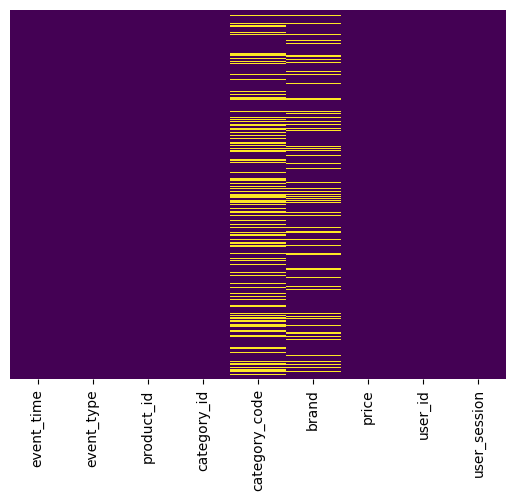

In [14]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

# Data Cleaning and Preprocessing

## Checking Duplicates

In [15]:
df.duplicated().sum()

np.int64(523)

In [16]:
df.duplicated(subset = ['event_time', 'event_type','product_id','user_id','user_session']).sum()

np.int64(523)

In [17]:
df[df.duplicated(subset = ['event_time','event_type','product_id','user_id','user_session'], keep = False)].head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
3009,2019-10-01 08:51:44 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,254.26,546907969,24b99289-5b3e-43ff-8eee-f00bc4bdc86d
3222,2019-10-01 10:06:23 UTC,cart,1004739,2053013555631882655,electronics.smartphone,xiaomi,197.43,555314417,a3c6a4f5-996e-4f8d-adb4-9aae8edd5dac
3725,2019-10-01 10:14:21 UTC,view,3701359,2053013565983425517,appliances.environment.vacuum,bosch,181.34,555581403,d6307980-1850-4ba2-9313-9a65e31f1923
5413,2019-10-01 08:40:56 UTC,cart,1004258,2053013555631882655,electronics.smartphone,apple,733.81,549976758,235bb025-285f-4310-b17c-60b1ccdceb4f
13004,2019-10-01 08:51:50 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,254.26,546907969,24b99289-5b3e-43ff-8eee-f00bc4bdc86d
13472,2019-10-01 08:21:22 UTC,cart,1004858,2053013555631882655,electronics.smartphone,samsung,133.81,551067897,128ced3c-7afd-4e77-9771-d831453de7f6
14416,2019-10-01 07:22:08 UTC,cart,1004838,2053013555631882655,electronics.smartphone,oppo,179.35,525197354,72670bbf-8aaa-4b21-9c4b-d1bcad667c1f
14744,2019-10-01 06:44:56 UTC,view,1004209,2053013555631882655,electronics.smartphone,samsung,95.21,555516663,41965dc5-74c9-492e-b9b4-c1d967ca5654
16911,2019-10-01 08:51:22 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,254.26,546907969,24b99289-5b3e-43ff-8eee-f00bc4bdc86d
17981,2019-10-01 05:54:54 UTC,cart,5100816,2053013553375346967,NaN,xiaomi,29.51,514110288,cd33c3e4-fb93-4302-8205-1f8b97ce13aa


In [18]:
df = df.drop_duplicates(subset = ['event_time','event_type','product_id','user_id','user_session'])

In [19]:
df.duplicated().sum()

np.int64(0)

## Data Standardization

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999477 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     999477 non-null  object 
 1   event_type     999477 non-null  object 
 2   product_id     999477 non-null  int64  
 3   category_id    999477 non-null  int64  
 4   category_code  678774 non-null  object 
 5   brand          852850 non-null  object 
 6   price          999477 non-null  float64
 7   user_id        999477 non-null  int64  
 8   user_session   999477 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 76.3+ MB


In [21]:
df['event_time'] = df['event_time'].apply(lambda x: str(x).replace(' UTC',''))

In [22]:
# df['event_time'] = pd.to_datetime(df['event_time'], errors = 'coerce')

In [23]:
df['event_time'] = pd.to_datetime(df['event_time'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [24]:
df['event_time'].head()

0   2019-10-01 04:32:52
1   2019-10-01 06:06:39
2   2019-10-01 05:11:34
3   2019-10-01 05:04:16
4   2019-10-01 09:04:19
Name: event_time, dtype: datetime64[ns]

In [25]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 04:32:52,view,12719453,2053013553559896355,NaN,matador,397.44,517886245,7d1528ae-8dfa-4c97-ab4c-974815b9f431
1,2019-10-01 06:06:39,view,10900328,2053013555069845885,appliances.kitchen.mixer,dauscher,12.84,519282157,55efefd9-53c4-472c-bf6e-45b60ea9ec5a
2,2019-10-01 05:11:34,view,3100564,2053013555262783879,appliances.kitchen.blender,philips,61.75,539168115,697beb54-e90e-4eeb-8822-eab39935c911
3,2019-10-01 05:04:16,view,26100001,2053013553887052089,NaN,sulu,25.74,555239099,19041a8f-8a4c-4d6f-934b-3130f33017fe
4,2019-10-01 09:04:19,view,1306569,2053013558920217191,computers.notebook,acer,1055.11,517726252,1872ffce-39dd-43de-ba53-a49b90281fed


In [26]:
df['event_hour'] = df['event_time'].dt.hour

In [27]:
df['weekday'] = df['event_time'].dt.weekday

In [28]:
df['event_hour'].unique()

array([ 4,  6,  5,  9,  2,  8,  7,  3, 10,  0,  1], dtype=int32)

In [29]:
df['weekday'].value_counts().sort_index()

weekday
1    499712
4    499765
Name: count, dtype: int64

## Note on weekend feature:
- The original dataseet subset contains only transactions on **Tuesday and Friday**
9- For analysis purposes:
  - **Tuesday** is treated as **weekday** (0)
  - **Friday** is treated as **weekend** (1)
- This assumption is made solely to enable meaningful comparisons between weekend and weekday sales.

In [30]:
df['is_weekend'] = df['event_time'].dt.weekday.apply(lambda x: 0 if x == 1 else 1)

In [31]:
df['is_weekend'].value_counts()

is_weekend
1    499765
0    499712
Name: count, dtype: int64

In [32]:
df['event_month'] = df['event_time'].dt.month_name().str[:3]

In [33]:
df['event_month'].value_counts()

event_month
Nov    499765
Oct    499712
Name: count, dtype: int64

In [34]:
df.head(2)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_hour,weekday,is_weekend,event_month
0,2019-10-01 04:32:52,view,12719453,2053013553559896355,NaN,matador,397.44,517886245,7d1528ae-8dfa-4c97-ab4c-974815b9f431,4,1,0,Oct
1,2019-10-01 06:06:39,view,10900328,2053013555069845885,appliances.kitchen.mixer,dauscher,12.84,519282157,55efefd9-53c4-472c-bf6e-45b60ea9ec5a,6,1,0,Oct


In [35]:
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    320703
brand            146627
price                 0
user_id               0
user_session          0
event_hour            0
weekday               0
is_weekend            0
event_month           0
dtype: int64

In [36]:
df['category_code'] = df['category_code'].astype(str).str.strip().replace(['nan','None','NaN',''], np.nan)

In [37]:
df['brand'] = df['brand'].astype(str).str.strip().replace(['nan','None','NaN',''], np.nan)

In [38]:
cat_map = df.dropna(subset=['category_code']).drop_duplicates('category_id')
cat_dict = dict(zip(cat_map['category_id'], cat_map['category_code']))

In [39]:
df['category_code'] = df['category_code'].fillna(df['category_id'].map(cat_dict))

In [40]:
def fill_mode(s):
    m = s.mode()
    return s.fillna(m.iloc[0]) if not m.empty else s
df['category_code'] = df.groupby('product_id')['category_code'].transform(fill_mode)

In [41]:
df['brand'] = df.groupby('product_id')['brand'].transform(fill_mode)

In [42]:
df['category_code'] = df['category_code'].fillna('Unknown')

In [43]:
df['brand'] = df['brand'].fillna('NoBrand')

In [44]:
df['category_code'].isnull().sum()     

np.int64(0)

In [45]:
df['brand'].isnull().sum()

np.int64(0)

### Raw data contained missing values in category_code and brand. Attempted logical imputation via category_id and product_id, but due to inconsistencies, remaining missing values were replaced with 'unknown' and 'NoBrand' to prevent data integrity.

In [46]:
df.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_hour,weekday,is_weekend,event_month
0,2019-10-01 04:32:52,view,12719453,2053013553559896355,Unknown,matador,397.44,517886245,7d1528ae-8dfa-4c97-ab4c-974815b9f431,4,1,0,Oct
1,2019-10-01 06:06:39,view,10900328,2053013555069845885,appliances.kitchen.mixer,dauscher,12.84,519282157,55efefd9-53c4-472c-bf6e-45b60ea9ec5a,6,1,0,Oct
2,2019-10-01 05:11:34,view,3100564,2053013555262783879,appliances.kitchen.blender,philips,61.75,539168115,697beb54-e90e-4eeb-8822-eab39935c911,5,1,0,Oct
3,2019-10-01 05:04:16,view,26100001,2053013553887052089,Unknown,sulu,25.74,555239099,19041a8f-8a4c-4d6f-934b-3130f33017fe,5,1,0,Oct
4,2019-10-01 09:04:19,view,1306569,2053013558920217191,computers.notebook,acer,1055.11,517726252,1872ffce-39dd-43de-ba53-a49b90281fed,9,1,0,Oct


In [47]:
split_cols = df['category_code'].str.split('.', n=2, expand=True)
split_cols.columns = ['main_category','sub_category','sub_sub_category']

In [48]:
df = pd.concat([df, split_cols], axis=1)

In [49]:
# Check
df[['category_code','main_category','sub_category','sub_sub_category']].head(10)

,category_code,main_category,sub_category,sub_sub_category
0,Unknown,Unknown,None,None
1,appliances.kitchen.mixer,appliances,kitchen,mixer
2,appliances.kitchen.blender,appliances,kitchen,blender
3,Unknown,Unknown,None,None
4,computers.notebook,computers,notebook,None
5,electronics.smartphone,electronics,smartphone,None
6,electronics.audio.headphone,electronics,audio,headphone
7,computers.peripherals.keyboard,computers,peripherals,keyboard
8,electronics.smartphone,electronics,smartphone,None
9,furniture.living_room.chair,furniture,living_room,chair


In [50]:
df['sub_category'] = df['sub_category'].fillna('Unknown')

In [51]:
df['sub_sub_category'] = df['sub_sub_category'].fillna('Unknown')

In [52]:
df.head(2)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_hour,weekday,is_weekend,event_month,main_category,sub_category,sub_sub_category
0,2019-10-01 04:32:52,view,12719453,2053013553559896355,Unknown,matador,397.44,517886245,7d1528ae-8dfa-4c97-ab4c-974815b9f431,4,1,0,Oct,Unknown,Unknown,Unknown
1,2019-10-01 06:06:39,view,10900328,2053013555069845885,appliances.kitchen.mixer,dauscher,12.84,519282157,55efefd9-53c4-472c-bf6e-45b60ea9ec5a,6,1,0,Oct,appliances,kitchen,mixer


## Removing unnecessary columns

In [53]:
cols_to_drop = ['category_id','user_session','weekday','event_time']
df = df.drop(columns = cols_to_drop)

In [54]:
df.head(2)

,event_type,product_id,category_code,brand,price,user_id,event_hour,is_weekend,event_month,main_category,sub_category,sub_sub_category
0,view,12719453,Unknown,matador,397.44,517886245,4,0,Oct,Unknown,Unknown,Unknown
1,view,10900328,appliances.kitchen.mixer,dauscher,12.84,519282157,6,0,Oct,appliances,kitchen,mixer


# EDA with Pandas and Visualization

In [55]:
df.to_csv('layoffs_cleaned.csv', index = False)

In [56]:
df.shape

(999477, 12)

In [57]:
df.head(4)

,event_type,product_id,category_code,brand,price,user_id,event_hour,is_weekend,event_month,main_category,sub_category,sub_sub_category
0,view,12719453,Unknown,matador,397.44,517886245,4,0,Oct,Unknown,Unknown,Unknown
1,view,10900328,appliances.kitchen.mixer,dauscher,12.84,519282157,6,0,Oct,appliances,kitchen,mixer
2,view,3100564,appliances.kitchen.blender,philips,61.75,539168115,5,0,Oct,appliances,kitchen,blender
3,view,26100001,Unknown,sulu,25.74,555239099,5,0,Oct,Unknown,Unknown,Unknown


In [58]:
df['event_type'].unique()

array(['view', 'cart', 'purchase'], dtype=object)

In [59]:
df['event_type'].value_counts()

event_type
view        964407
purchase     19352
cart         15718
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_8516\3737363396.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


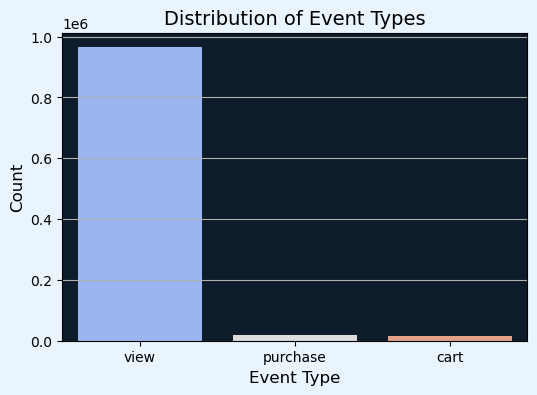

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.gca().set_facecolor('#0d1b2a')   
plt.gcf().set_facecolor('#eaf4fc')   

sns.countplot(
    x='event_type',
    data=df,
    order=df['event_type'].value_counts().index,
    palette='coolwarm'
)

plt.title("Distribution of Event Types", fontsize=14, color="black")
plt.xlabel("Event Type", fontsize=12, color="black")
plt.ylabel("Count", fontsize=12, color="black")
plt.grid(True, axis = 'y')
plt.savefig('Distribution_of_Event_Types')

### Users are actively browsing the platform, as evidenced by the overwhelming number of product views (~1 million). However, far fewer items are being added to carts or purchased, signaling a critical gap in the conversion funnel. This pattern suggests an opportunity to optimize the shopping journey, for example, by highlighting popular products, offering personalized recommendations, or introducing timely incentives to encourage users to move from simply viewing products to making a purchase.

In [61]:
top_categories = df['category_code'].value_counts().head(10)
top_categories

category_code
Unknown                             320703
electronics.smartphone              271355
electronics.clocks                   30453
computers.notebook                   27878
electronics.audio.headphone          27096
electronics.video.tv                 24263
appliances.environment.vacuum        18966
appliances.kitchen.refrigerators     18602
appliances.kitchen.washer            17722
apparel.shoes                        17367
Name: count, dtype: int64

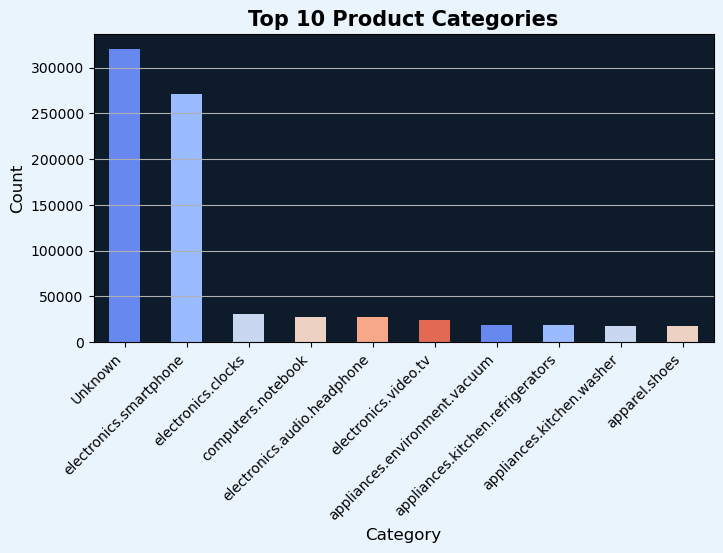

In [62]:
plt.figure(figsize=(8,4))
plt.gca().set_facecolor('#0d1b2a')   
plt.gcf().set_facecolor('#eaf4fc')   

df['category_code'].value_counts().head(10).plot(
    kind='bar',
    color=sns.color_palette("coolwarm")   
)
plt.title("Top 10 Product Categories", fontsize=15, fontweight = 'bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha = 'right')
plt.grid(True, axis = 'y')
plt.savefig('Top_10_Product_Categories')

### The top 10 product categories reveal that ‘Unknown’ leads with over 300,000 interactions, indicating gaps in product categorization. Among known categories, Electronics, especially Smartphones (~250,000 views), attract the most user attention. This highlights clear user preferences and suggests focusing on popular categories while improving data quality for uncategorized products.

In [63]:
top_revenue_categories = df[df['event_type']=='purchase'].groupby('main_category')['price'].sum().sort_values(ascending=False).head(10)
top_revenue_categories

main_category
electronics     4609940.44
Unknown          629736.70
appliances       322207.69
computers        299142.99
furniture         53370.00
kids              29867.08
auto              24004.36
construction      23618.12
apparel           12185.16
sport              5928.80
Name: price, dtype: float64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_8516\3733048701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_revenue_categories.index, y=top_revenue_categories.values, palette="coolwarm")


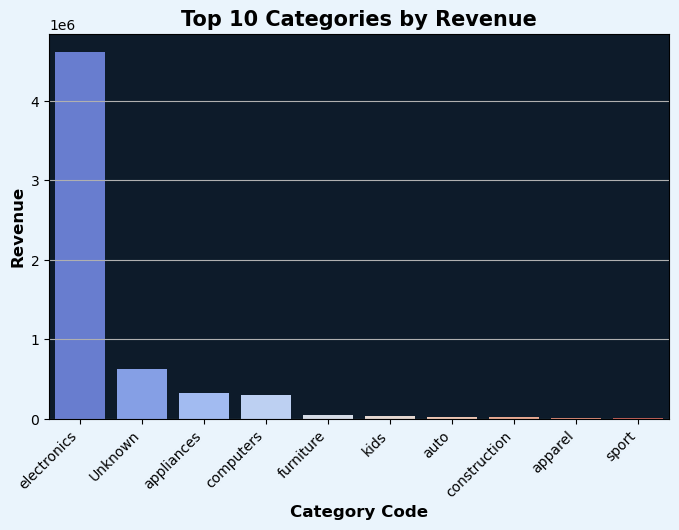

In [64]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_revenue_categories.index, y=top_revenue_categories.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Top 10 Categories by Revenue", fontsize=15, fontweight = 'bold')
plt.xlabel("Category Code", fontsize=12, fontweight = 'bold')
plt.ylabel("Revenue", fontsize=12, fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis = 'y')
plt.savefig('Top_10_Categories_by_Revenue')

### Revenue analysis reveals that Electronics dominate earnings with around 4.5 million, far surpassing all other categories. Other categories, including Unknown and Appliances, contribute significantly less, each under 1 million. This stark contrast highlights Electronics as the primary revenue driver, suggesting that prioritizing inventory, promotions, and marketing for this category could maximize overall profitability.

In [65]:
df['sub_category'].describe()

count      999477
unique         58
top       Unknown
freq       320703
Name: sub_category, dtype: object

In [66]:
top_sub_categories = df['sub_category'].value_counts().head(10)
top_sub_categories

sub_category
Unknown        320703
smartphone     271355
kitchen         77947
audio           37400
clocks          30453
environment     30327
notebook        27878
shoes           27120
video           24625
accessories     20760
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_8516\2612643117.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sub_categories.index, y=top_sub_categories.values, palette="coolwarm")


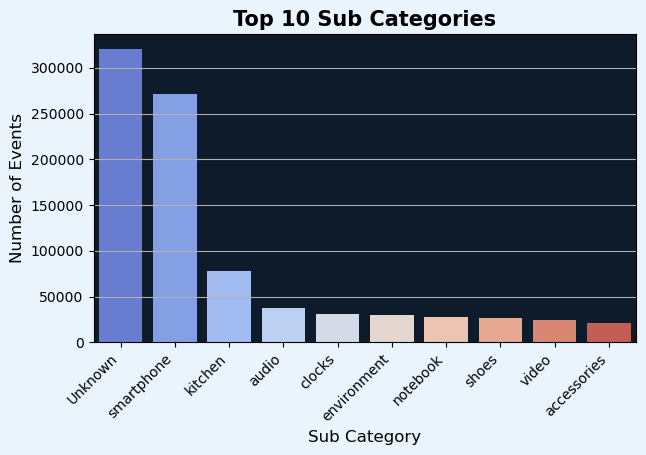

In [67]:
plt.figure(figsize=(7,4))
sns.barplot(x=top_sub_categories.index, y=top_sub_categories.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Top 10 Sub Categories", fontsize=15, fontweight = 'bold')
plt.xlabel("Sub Category", fontsize=12)
plt.ylabel("Number of Events", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis = 'y')
plt.savefig('Top_10_Sub_Categories')

### The top sub-categories show that ‘Unknown’ leads in user interactions, highlighting gaps in product classification. Among known sub-categories, Smartphones and Kitchen products receive the most attention. This pattern emphasizes the importance of key product segments for user engagement, while also underlining the need to improve categorization for better analytics and decision-making.

In [68]:
df['brand'].unique()

array(['matador', 'dauscher', 'philips', ..., 'honda', 'alaskaoriginale',
       'katun'], shape=(2685,), dtype=object)

In [69]:
df['brand'].describe()

count      999477
unique       2685
top       NoBrand
freq       145709
Name: brand, dtype: object

In [70]:
top_brands = df['brand'].value_counts().head(10)
top_brands

brand
NoBrand    145709
samsung    122949
apple      101947
xiaomi      70926
huawei      25463
lucente     16265
bosch       12332
lg          11388
oppo        10708
sony        10279
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_8516\3735213391.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette="coolwarm")


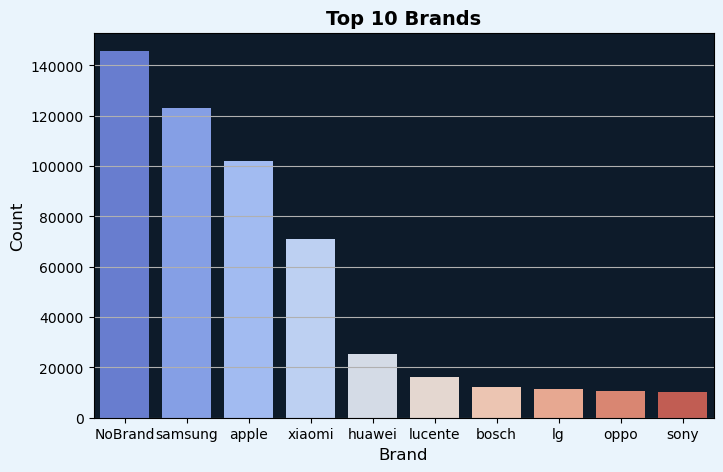

In [71]:
plt.figure(figsize=(8,5))
plt.gca().set_facecolor('#0d1b2a')   
plt.gcf().set_facecolor('#eaf4fc')   

sns.barplot(x=top_brands.index, y=top_brands.values, palette="coolwarm")
plt.title("Top 10 Brands", fontsize=14, fontweight = 'bold')
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True, axis='y')
plt.savefig('Top_10_Brands')

### Ignoring products with no brand, Samsung leads with around 120,000 interactions, followed closely by Apple and Xiaomi. All top brands belong to the smartphone segment, indicating that user engagement is heavily concentrated in mobile devices. This insight highlights smartphones as a key driver of user activity, suggesting that targeted promotions and inventory management in this segment could significantly influence overall engagement.

In [72]:
top_cart_categories = df[df['event_type'] == 'cart']['category_code'].value_counts().head(10)
top_cart_categories

category_code
electronics.smartphone           10853
Unknown                           1675
electronics.audio.headphone        968
electronics.video.tv               475
electronics.clocks                 353
appliances.environment.vacuum      210
appliances.kitchen.washer          104
electronics.telephone              104
electronics.tablet                  92
auto.accessories.alarm              88
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_8516\1536723059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cart_categories.index, y=top_cart_categories.values, palette="coolwarm")


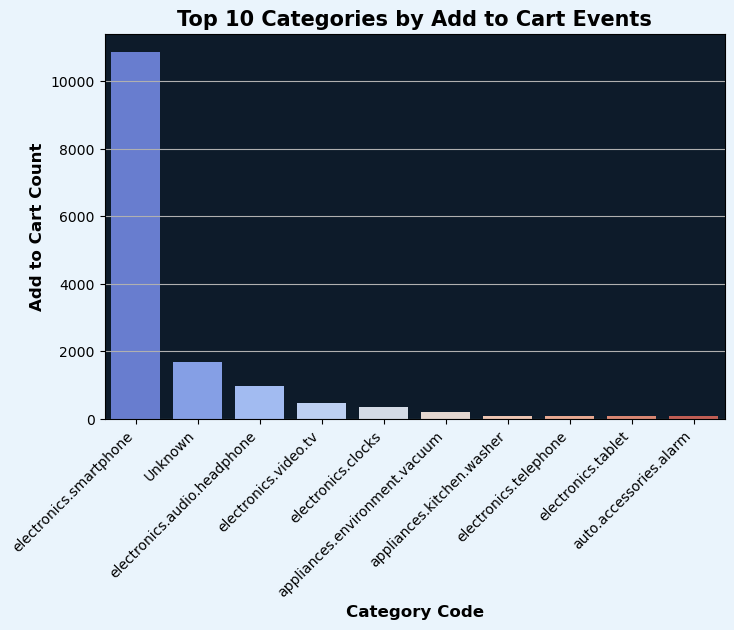

In [73]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_cart_categories.index, y=top_cart_categories.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')  
plt.gcf().set_facecolor('#eaf4fc')  

plt.title("Top 10 Categories by Add to Cart Events", fontsize=15, fontweight = 'bold')
plt.xlabel("Category Code", fontsize=12, fontweight = 'bold')
plt.ylabel("Add to Cart Count", fontsize=12, fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis = 'y')
plt.savefig('Top_Categories_bt_Add_to_Cart_Events')

### Analysis of add-to-cart events shows that Electronics → Smartphones dominate with over 10,000 additions, followed by some Unknown categories and other Electronics segments like Audio → Headphones and Video → TVs. This indicates that users are primarily interested in high-demand Electronics products when moving toward purchase, highlighting key categories to prioritize for promotions, inventory planning, and conversion optimization.

In [74]:
top_purchase_categories = df[df['event_type'] == 'purchase']['category_code'].value_counts().head(10)
top_purchase_categories

category_code
electronics.smartphone              8986
Unknown                             4626
electronics.audio.headphone          813
electronics.video.tv                 507
electronics.clocks                   425
computers.notebook                   368
appliances.kitchen.washer            350
appliances.environment.vacuum        310
appliances.kitchen.refrigerators     267
electronics.tablet                   114
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_8516\4281366437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_purchase_categories.index, y=top_purchase_categories.values, palette="coolwarm")


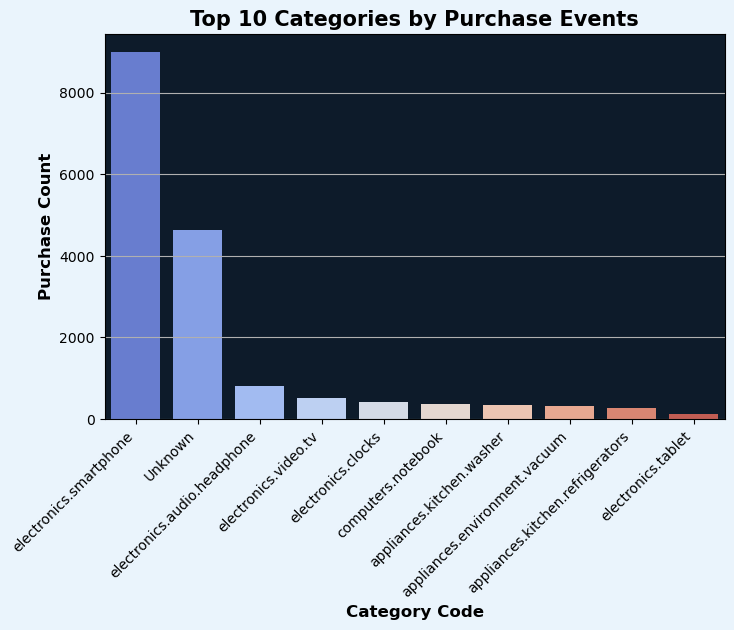

In [75]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_purchase_categories.index, y=top_purchase_categories.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')  
plt.gcf().set_facecolor('#eaf4fc')   

plt.title("Top 10 Categories by Purchase Events", fontsize=15, fontweight = 'bold')
plt.xlabel("Category Code", fontsize=12, fontweight = 'bold')
plt.ylabel("Purchase Count", fontsize=12, fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis = 'y')
plt.savefig('Top_Categories_by_Purchase_Events')

### Purchase events reveal that Electronics → Smartphones lead with around 9,000 purchases, followed by some Unknown categories (~4,000 purchases) and other Electronics segments like Headphones and Video TVs. This shows that smartphones are the primary revenue-driving products, emphasizing the importance of focusing marketing efforts, stock availability, and promotional campaigns on this high-demand segment to maximize conversions.

In [76]:
top_product_count = df[df['event_type'] == 'purchase']['product_id'].value_counts().head(10)
top_product_count

product_id
1004856    886
1004767    597
1005115    400
1004833    345
1002544    325
1004870    298
4804056    293
1004249    247
1004836    190
1005105    190
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_8516\3531436602.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product_count.index, y=top_product_count.values, palette="coolwarm")


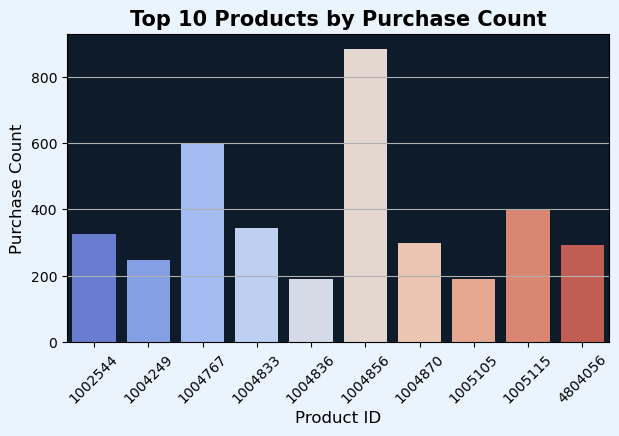

In [77]:
plt.figure(figsize=(7,4))
sns.barplot(x=top_product_count.index, y=top_product_count.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Top 10 Products by Purchase Count", fontsize=15, fontweight = 'bold')
plt.xlabel("Product ID", fontsize=12)
plt.ylabel("Purchase Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis = 'y')
plt.savefig('Top_10_Products_by_Purchase_Counts')

### The top products by purchase count reveal that Product ID 1004856 leads with over 800 purchases, followed by Product ID 1004767 with around 600 purchases and many more. This highlights specific high-demand products that drive significant user conversions. Focusing on these items for promotions, inventory management, and cross-selling strategies could help maximize overall revenue.

In [78]:
top_products_revenue = df[df['event_type']=='purchase'].groupby('product_id')['price'].sum().sort_values(ascending=False).head(10)
top_products_revenue

product_id
1005115    383855.83
1005105    261518.63
1004249    180287.03
1005135    161784.12
1002544    149955.22
1004767    148648.46
1004856    114829.04
1004870     83797.83
1003317     75540.14
1002524     69788.16
Name: price, dtype: float64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_8516\859970930.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_revenue.index, y=top_products_revenue.values, palette="coolwarm")


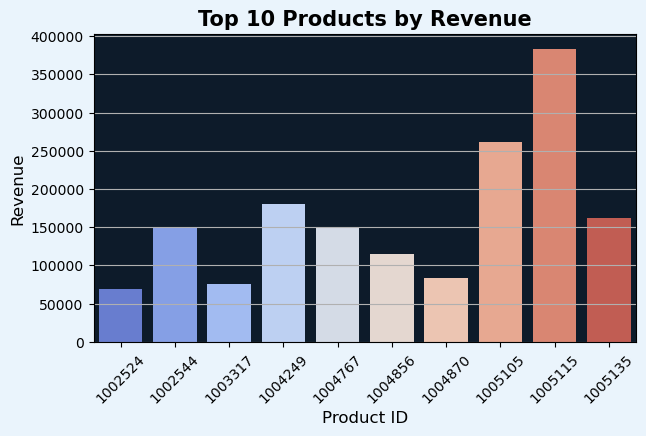

In [79]:
plt.figure(figsize=(7,4))
sns.barplot(x=top_products_revenue.index, y=top_products_revenue.values, palette="coolwarm")

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Top 10 Products by Revenue", fontsize=15, fontweight = 'bold')
plt.xlabel("Product ID", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis = 'y')
plt.savefig('Top_10_Products_by_Revenue')

### Revenue analysis at the product level shows that Product ID 1005115 generates the highest revenue, exceeding 350,000, followed by Product ID 1005105 with over 250,000. Several other products contribute moderately, but the majority of revenue is concentrated in a few high-performing items. This underscores the importance of identifying top-revenue products for targeted promotions, inventory prioritization, and strategic marketing efforts.

In [80]:
df['price'].describe()

count    999477.000000
mean        291.411901
std         357.031082
min           0.000000
25%          64.610000
50%         162.170000
75%         360.260000
max        2574.070000
Name: price, dtype: float64

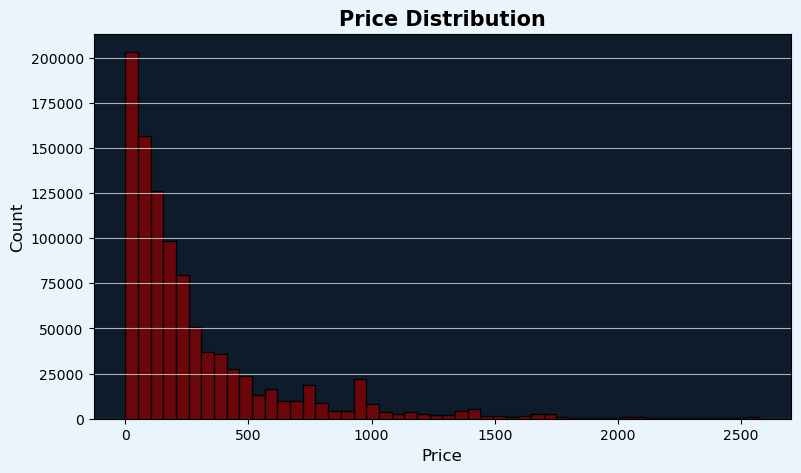

In [81]:
plt.figure(figsize=(9,5))
sns.histplot(df['price'].dropna(), bins=50, color='darkred')

plt.gca().set_facecolor('#0d1b2a')  
plt.gcf().set_facecolor('#eaf4fc')   

plt.title("Price Distribution", fontsize=15, fontweight = 'bold')
plt.xlabel("Price", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True, axis = 'y')
plt.savefig('Price_Distribution')

### The price distribution reveals that the majority of products are priced between 0–500, reflecting a high volume of affordable items on the platform. This suggests that the platform caters predominantly to budget-conscious consumers, and pricing strategies, promotions, and inventory planning should take this trend into account to maximize sales and engagement.

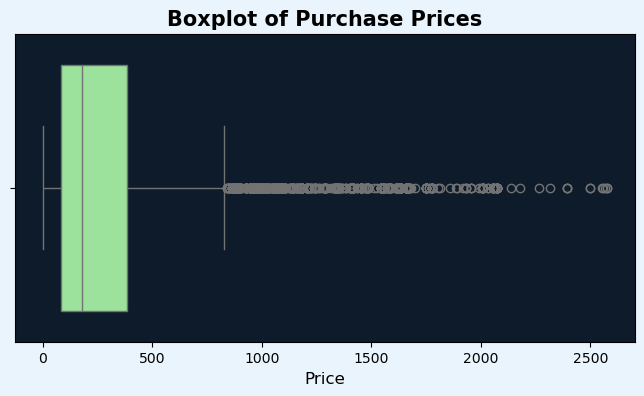

In [82]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df[df['event_type']=='purchase']['price'], color='lightgreen')

plt.gca().set_facecolor('#0d1b2a')   
plt.gcf().set_facecolor('#eaf4fc')   

plt.title("Boxplot of Purchase Prices", fontsize=15, fontweight = 'bold')
plt.xlabel("Price", fontsize=12)
plt.savefig('Boxplot_of_Purchase_Prices')

### The boxplot of purchase prices shows that most transactions occur between 100 and 400, with a median around 200–250, indicating a concentration in the affordable price segment. While the maximum observed price is around 800, there are numerous high-value outliers extending up to 2,200. This suggests a wide range of customer spending behavior, highlighting opportunities for both budget and premium product strategies.

In [83]:
purchases = df[df['event_type'] == 'purchase']

In [84]:
user_purchase_counts = purchases.groupby('user_id')['product_id'].count().reset_index()
user_purchase_counts.rename(columns={'product_id': 'purchase_count'}, inplace=True)
user_purchase_counts.head()

,user_id,purchase_count
0,356520186,1
1,397023870,1
2,451971397,1
3,453705583,1
4,457360398,1


In [85]:
top_repeat_users = user_purchase_counts.sort_values('purchase_count', ascending=False).head(10)
top_repeat_users

,user_id,purchase_count
11311,554090147,26
8477,541311429,23
6331,526933626,21
10021,548891541,20
13778,565969544,17
7018,531974857,17
8488,541337272,16
8486,541328903,16
3269,515934670,14
13263,562929381,14


In [86]:
user_mapping = {uid: f"User {i+1}" for i, uid in enumerate(top_repeat_users['user_id'])}
user_mapping

{554090147: 'User 1',
 541311429: 'User 2',
 526933626: 'User 3',
 548891541: 'User 4',
 565969544: 'User 5',
 531974857: 'User 6',
 541337272: 'User 7',
 541328903: 'User 8',
 515934670: 'User 9',
 562929381: 'User 10'}

In [87]:
top_repeat_users['user_id'] = top_repeat_users['user_id'].replace(user_mapping)
top_repeat_users

,user_id,purchase_count
11311,User 1,26
8477,User 2,23
6331,User 3,21
10021,User 4,20
13778,User 5,17
7018,User 6,17
8488,User 7,16
8486,User 8,16
3269,User 9,14
13263,User 10,14


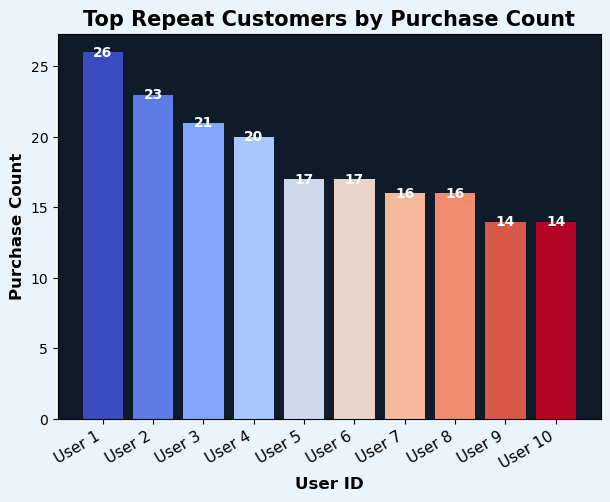

In [88]:
plt.figure(figsize=(7,5))
values = top_repeat_users.values
labels = top_repeat_users.index
cmap = plt.cm.coolwarm
colors = cmap(np.linspace(0,1, len(values)))
bars = plt.bar(top_repeat_users['user_id'].astype(str), top_repeat_users['purchase_count'], color= colors)

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Top Repeat Customers by Purchase Count", fontsize=15, fontweight='bold')
plt.xlabel("User ID", fontsize=12, fontweight='bold')
plt.ylabel("Purchase Count", fontsize=12, fontweight='bold')
plt.xticks(rotation=30, ha='right', fontsize=11)

# Annotate bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()-0.5,
             f"{int(bar.get_height())}", ha='center', va='bottom', color='white', fontweight='bold')

plt.savefig('Top_Repeat_Customers_by_Purchase_Count')

### The analysis of repeat customers highlights that User 1 leads with 26 purchases, followed by User 2 with 23 and User 3 with 21, showing a small group of highly engaged users driving significant activity. This pattern emphasizes the importance of loyal customers and suggests opportunities for personalized offers, loyalty programs, or targeted marketing to further enhance retention and revenue from top buyers.

In [89]:
user_purchase_counts['is_repeat'] = user_purchase_counts['purchase_count'].apply(lambda x: 1 if x>1 else 0)

In [90]:
repeat_users = user_purchase_counts[user_purchase_counts['is_repeat'] == 1]['user_id']
repeat_users.head(10)

15    512364896
22    512368168
31    512372458
44    512376264
50    512379865
52    512381263
53    512381662
55    512382536
58    512382879
60    512383347
Name: user_id, dtype: int64

In [91]:
repeat_purchases = purchases[purchases['user_id'].isin(repeat_users)]
repeat_purchases.head(10)

,event_type,product_id,category_code,brand,price,user_id,event_hour,is_weekend,event_month,main_category,sub_category,sub_sub_category
94,purchase,1004237,electronics.smartphone,apple,1093.95,540514956,9,0,Oct,electronics,smartphone,Unknown
392,purchase,33900010,Unknown,mercury,2499.68,544789376,3,0,Oct,Unknown,Unknown,Unknown
510,purchase,26203912,Unknown,NoBrand,127.42,555523728,8,0,Oct,Unknown,Unknown,Unknown
524,purchase,1004791,electronics.smartphone,xiaomi,142.86,555523402,7,0,Oct,electronics,smartphone,Unknown
767,purchase,2701640,appliances.kitchen.refrigerators,NoBrand,220.14,537600119,3,0,Oct,appliances,kitchen,refrigerators
782,purchase,1003363,electronics.smartphone,apple,535.38,514073817,8,0,Oct,electronics,smartphone,Unknown
825,purchase,4804295,electronics.audio.headphone,xiaomi,22.39,519533291,9,0,Oct,electronics,audio,headphone
1042,purchase,1005105,electronics.smartphone,apple,1415.48,512379865,8,0,Oct,electronics,smartphone,Unknown
1077,purchase,21403083,electronics.clocks,casio,47.88,521845933,7,0,Oct,electronics,clocks,Unknown
1209,purchase,1004767,electronics.smartphone,samsung,254.26,512730829,9,0,Oct,electronics,smartphone,Unknown


In [92]:
category_repeat = repeat_purchases.groupby('main_category')['product_id'].count().sort_values(ascending=False).head(10)
category_repeat

main_category
electronics     4530
Unknown         1704
appliances       651
computers        286
furniture        111
construction      78
auto              69
kids              48
apparel           43
accessories       18
Name: product_id, dtype: int64

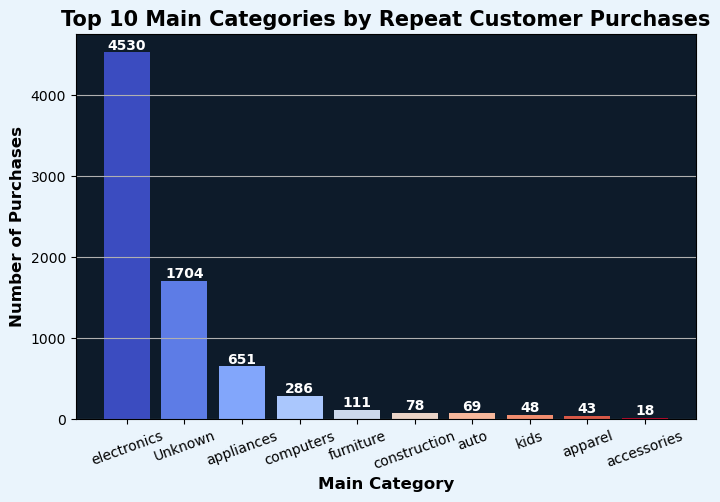

In [93]:
plt.figure(figsize=(8,5))
values = category_repeat.values
labels = category_repeat.index
cmap = plt.cm.coolwarm
colors = cmap(np.linspace(0,1, len(values)))
bars = plt.bar(category_repeat.index, category_repeat.values, color=colors)

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Top 10 Main Categories by Repeat Customer Purchases", fontsize=15, fontweight='bold')
plt.xlabel("Main Category", fontsize=12, fontweight='bold')
plt.ylabel("Number of Purchases", fontsize=12, fontweight='bold')
plt.xticks(rotation = 20)
plt.grid(True, axis = 'y')

for bar, val in zip(bars, category_repeat.values):
    plt.text(bar.get_x() + bar.get_width()/2, val-0.5, f"{val}", ha='center', va='bottom', color='white', fontweight='bold')

plt.savefig('Top_10_Main_Categories_by_Repeat_Customer_Purchases')

### Among repeat customers, Electronics clearly dominates with 4,530 purchases, followed by Unknown categories (1,704) and Appliances (651). Computers and other categories contribute modestly. This distribution highlights that repeat buyers are primarily drawn to high-demand, core product segments, suggesting that focusing loyalty programs and personalized recommendations on these categories could significantly boost repeat sales.

In [94]:
purchase_df = df[df['event_type'] == 'purchase'].copy()

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_8516\3598308948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_weekend', data=purchase_df, palette='coolwarm')


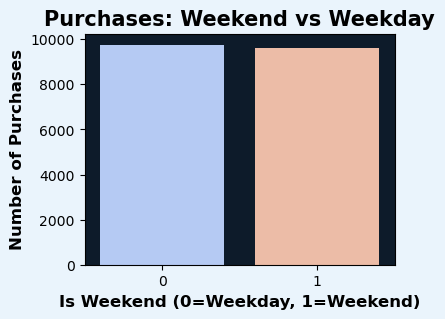

In [95]:
plt.figure(figsize=(4,3))
sns.countplot(x='is_weekend', data=purchase_df, palette='coolwarm')
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Purchases: Weekend vs Weekday", fontsize=15, fontweight='bold')
plt.xlabel("Is Weekend (0=Weekday, 1=Weekend)", fontsize=12, fontweight='bold')
plt.ylabel("Number of Purchases", fontsize=12, fontweight='bold')
plt.savefig('Purchases_by_Weekend_vs_Weekday')

### Despite having only two weekend days in the dataset, the number of purchases on weekends is nearly equal to weekdays, indicating high engagement during weekends. This suggests that users are more likely to make purchases on weekends, highlighting an opportunity for targeted promotions, marketing campaigns, and flash sales during these peak days to maximize conversions.

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_8516\260175012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='event_month', data=purchase_df, palette='coolwarm')


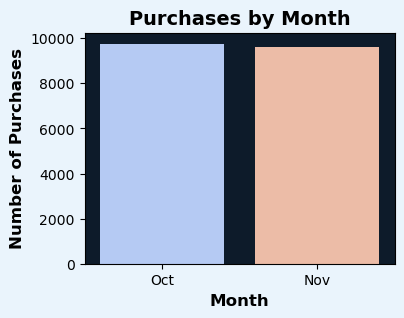

In [96]:
plt.figure(figsize=(4,3))
sns.countplot(x='event_month', data=purchase_df, palette='coolwarm')
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Purchases by Month", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12, fontweight='bold')
plt.ylabel("Number of Purchases", fontsize=12, fontweight='bold')
plt.savefig('Purchases_by_Month')

### Analysis of monthly purchases shows that October and November have approximately equal transaction volumes. This indicates a consistent purchasing pattern across these two months, suggesting that the platform experiences steady demand during this period.

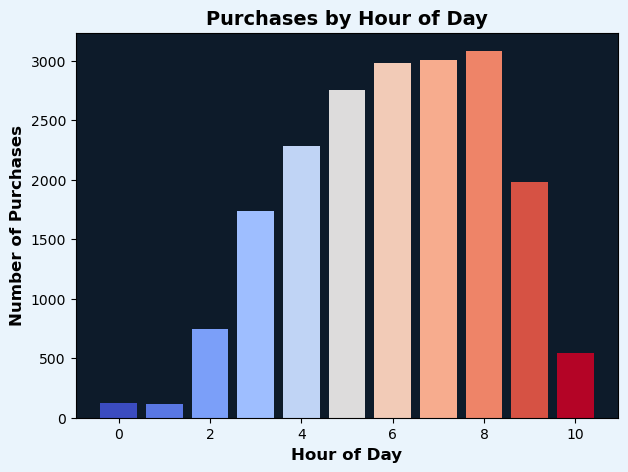

In [97]:
hourly_counts = purchase_df['event_hour'].value_counts().sort_index()

plt.figure(figsize=(7,5))
plt.bar(hourly_counts.index, hourly_counts.values, color=plt.cm.coolwarm(np.linspace(0,1,len(hourly_counts))))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

plt.title("Purchases by Hour of Day", fontsize=14, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12, fontweight='bold')
plt.ylabel("Number of Purchases", fontsize=12, fontweight='bold')
plt.savefig('Purchases_by_Hour_of_Day')

### Hourly analysis reveals that the majority of purchases occur between 4 PM and 8 PM, indicating that users are most active during the evening hours. This highlights an important time window for targeted promotions, notifications, and flash sales, allowing the platform to strategically engage users when they are most likely to complete transactions.

In [98]:
funnel = df['event_type'].value_counts()
funnel

event_type
view        964407
purchase     19352
cart         15718
Name: count, dtype: int64

In [99]:
funnel_conversion = {
    "View → Cart": round((funnel['cart'] / funnel['view']) * 100, 2),
    "Cart → Purchase": round((funnel['purchase'] / funnel['cart']) * 100, 2),
    "View → Purchase": round((funnel['purchase'] / funnel['view']) * 100, 2)
}
funnel_conversion

{'View → Cart': np.float64(1.63),
 'Cart → Purchase': np.float64(123.12),
 'View → Purchase': np.float64(2.01)}

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_8516\2020633819.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Stage", y="Conversion Rate (%)", data=conv_df, palette="coolwarm")


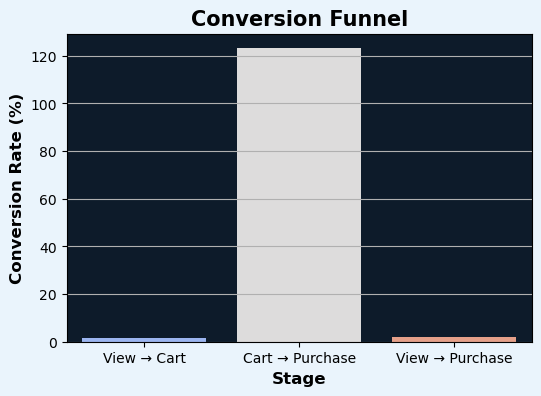

In [100]:
conv_df = pd.DataFrame(list(funnel_conversion.items()), columns=["Stage", "Conversion Rate (%)"])

plt.figure(figsize=(6,4))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

sns.barplot(x="Stage", y="Conversion Rate (%)", data=conv_df, palette="coolwarm")

plt.title("Conversion Funnel", fontsize=15, fontweight = 'bold')
plt.xlabel("Stage", fontsize=12, fontweight = 'bold')
plt.ylabel("Conversion Rate (%)", fontsize=12, fontweight = 'bold')
plt.grid(True, axis = 'y')
plt.savefig("Conversion_Funnel")

### The conversion funnel shows that the highest conversion occurs from Cart → Purchase, exceeding 120%, indicating that users who add items to their cart are highly likely to complete the purchase. This emphasizes the effectiveness of the checkout process and suggests that optimizing earlier stages, like product views and add-to-cart prompts, could further enhance overall conversions.

In [101]:
funnel_users = df.groupby('event_type')['user_id'].nunique()
funnel_users = funnel_users[['view', 'cart', 'purchase']]  
funnel_users

event_type
view        177621
cart          8883
purchase     14584
Name: user_id, dtype: int64

In [102]:
# Step-to-step conversion rates
conv_view_to_cart = (funnel_users['cart'] / funnel_users['view']) * 100
conv_cart_to_purchase = (funnel_users['purchase'] / funnel_users['cart']) * 100

# Drop-offs
drop_view_to_cart = 100 - conv_view_to_cart
drop_cart_to_purchase = 100 - conv_cart_to_purchase

print("View → Cart Conversion:", round(conv_view_to_cart, 2), "%")
print("View → Cart Drop-off:", round(drop_view_to_cart, 2), "%\n")

print("Cart → Purchase Conversion:", round(conv_cart_to_purchase, 2), "%")
print("Cart → Purchase Drop-off:", round(drop_cart_to_purchase, 2), "%")

View → Cart Conversion: 5.0 %
View → Cart Drop-off: 95.0 %

Cart → Purchase Conversion: 164.18 %
Cart → Purchase Drop-off: -64.18 %


In [103]:
stages = ['View → Cart', 'Cart → Purchase']
dropoffs = [drop_view_to_cart, drop_cart_to_purchase]
dropoffs

[np.float64(94.99890215683956), np.float64(-64.17876843408757)]

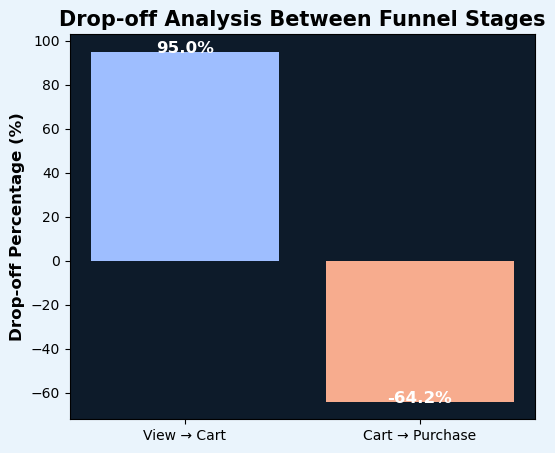

In [104]:
plt.figure(figsize=(6,5))
bars = plt.bar(stages, dropoffs, color=plt.cm.coolwarm([0.3, 0.7]))

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

# Annotate bars
for bar, val in zip(bars, dropoffs):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()-2,
             f"{val:.1f}%", ha='center', va='bottom', color='white', fontsize=12, weight='bold')

plt.title("Drop-off Analysis Between Funnel Stages", fontsize=15, fontweight = 'bold')
plt.ylabel("Drop-off Percentage (%)", fontsize=12, fontweight = 'bold')
plt.savefig("Drop_off_Analysis")

### The drop-off analysis reveals that the largest percentage loss occurs between View → Cart (95%), while the Cart → Purchase stage shows a negative drop-off (-62.2%), indicating more purchases than cart additions in the dataset. This highlights a critical opportunity to improve product discovery and add-to-cart prompts, ensuring that more viewers transition into the cart stage, ultimately boosting overall conversion rates.

In [105]:
category_funnel = (
    df.groupby(['main_category', 'event_type'])['user_id']
      .nunique()
      .unstack(fill_value=0)
      [['view', 'cart', 'purchase']]   
)

category_funnel.head()

event_type,view,cart,purchase
main_category,,,
Unknown,69458,1011,3746
accessories,1585,0,33
apparel,7964,1,132
appliances,21841,369,1563
auto,4885,89,182


In [106]:
# Conversion rates
category_funnel['conv_view_to_cart'] = (category_funnel['cart'] / category_funnel['view']) * 100
category_funnel['conv_cart_to_purchase'] = (category_funnel['purchase'] / category_funnel['cart']) * 100

# Drop-off %
category_funnel['drop_view_to_cart'] = 100 - category_funnel['conv_view_to_cart']
category_funnel['drop_cart_to_purchase'] = 100 - category_funnel['conv_cart_to_purchase']

category_funnel[['drop_view_to_cart', 'drop_cart_to_purchase']].head()

event_type,drop_view_to_cart,drop_cart_to_purchase
main_category,,
Unknown,98.544444,-2.705242e+02
accessories,100.000000,-inf
apparel,99.987443,-1.310000e+04
appliances,98.310517,-3.235772e+02
auto,98.178096,-1.044944e+02


In [107]:
top_drop = category_funnel.sort_values('drop_cart_to_purchase', ascending=False).head(10)
top_drop

event_type,view,cart,purchase,conv_view_to_cart,conv_cart_to_purchase,drop_view_to_cart,drop_cart_to_purchase
main_category,,,,,,,
electronics,83684,7255,8367,8.669519,115.327360,91.330481,-15.327360
auto,4885,89,182,1.821904,204.494382,98.178096,-104.494382
construction,3877,71,175,1.831313,246.478873,98.168687,-146.478873
Unknown,69458,1011,3746,1.455556,370.524233,98.544444,-270.524233
stationery,61,1,4,1.639344,400.000000,98.360656,-300.000000
appliances,21841,369,1563,1.689483,423.577236,98.310517,-323.577236
computers,10694,127,576,1.187582,453.543307,98.812418,-353.543307
country_yard,148,1,5,0.675676,500.000000,99.324324,-400.000000
medicine,118,1,6,0.847458,600.000000,99.152542,-500.000000


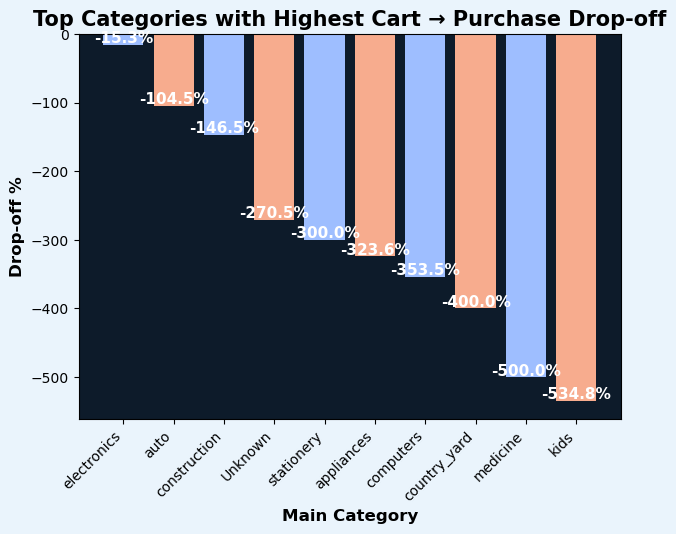

In [108]:
plt.figure(figsize=(7,5))
bars = plt.bar(top_drop.index, top_drop['drop_cart_to_purchase'], color = plt.cm.coolwarm([0.3,0.7]))

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

# Annotate bars
for bar, val in zip(bars, top_drop['drop_cart_to_purchase']):
    plt.text(bar.get_x() + bar.get_width()/2, val-2,
             f"{val:.1f}%", ha='center', va='bottom', color='white', fontsize=11, weight='bold')

plt.title("Top Categories with Highest Cart → Purchase Drop-off", fontsize=15, fontweight = 'bold')
plt.xlabel("Main Category", fontsize=12, fontweight = 'bold')
plt.ylabel("Drop-off %", fontsize=12, fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.savefig('Top_Categories_with_Highest_Cart_to_Purchase_Drop_off')

### Category-level analysis of Cart → Purchase drop-offs shows that Electronics experiences a minor negative drop (-15.3%), indicating stable conversions, while Auto, Kids, and Medicine exhibit unusually high negative values. These extreme negatives likely reflect data anomalies or delayed cart logging rather than actual user behavior. Ensuring accurate tracking and monitoring at the category level can provide more reliable insights for optimizing checkout performance.

In [109]:
revenue_by_category = df.groupby("main_category")["price"].sum().sort_values(ascending=False)
revenue_by_category

main_category
electronics     1.591905e+08
Unknown         5.670934e+07
computers       2.933621e+07
appliances      2.363655e+07
furniture       9.801793e+06
auto            2.961463e+06
construction    2.854548e+06
apparel         2.738080e+06
kids            1.947993e+06
sport           1.651149e+06
accessories     3.017320e+05
country_yard    1.127613e+05
medicine        1.373880e+04
stationery      3.629580e+03
Name: price, dtype: float64

In [110]:
cumulative_pct = revenue_by_category.cumsum() / revenue_by_category.sum() * 100
cumulative_pct

main_category
electronics      54.655903
Unknown          74.126287
computers        84.198476
appliances       92.313766
furniture        95.679079
auto             96.695857
construction     97.675927
apparel          98.616010
kids             99.284827
sport            99.851726
accessories      99.955322
country_yard     99.994037
medicine         99.998754
stationery      100.000000
Name: price, dtype: float64

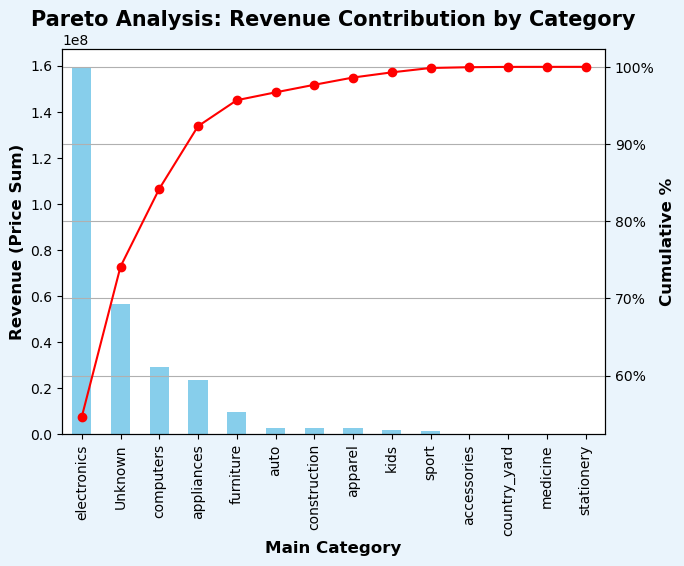

In [111]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(7,5))
ax = revenue_by_category.plot(kind='bar', color='skyblue')

ax2 = ax.twinx()
ax2.plot(cumulative_pct.values, color='red', marker="o", linestyle='-')
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y)}%'))

plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

ax.set_title("Pareto Analysis: Revenue Contribution by Category", fontsize=15, fontweight='bold')
ax.set_xlabel("Main Category", fontsize=12, fontweight='bold')
ax.set_ylabel("Revenue (Price Sum)", fontsize=12, fontweight='bold')
ax2.set_ylabel("Cumulative %", fontsize=12, fontweight='bold')
plt.xticks(rotation=30, ha='right')
plt.grid(True, axis='y')

plt.savefig('Pareto _Analysis_Revenue_Contribution_by_Category')

### The Pareto analysis reveals that Electronics drives the highest revenue, contributing approximately 1.6 crore by total price, followed by Unknown and Computers categories. Despite Electronics leading in absolute revenue, its cumulative contribution is under 60%, while Unknown and Computers push the cumulative percentage to around 75% and 85% respectively. Categories like Medicine and Stationery complete the cumulative 100%, highlighting that a small number of top-performing categories generate the majority of revenue, aligning with the classic 80/20 principle.

---